In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def initialize_bandit(q_values):
    n_arms = len(q_values)
    n = np.zeros(n_arms)
    return n_arms, n

def pull_arm(q_values, n, c):
    ucb = q_values + c * np.sqrt(np.log(n.sum()) / (n + 1e-5))
    arm = np.argmax(ucb)
    reward = np.random.randn() + q_values[arm]
    n[arm] += 1
    q_values[arm] += (reward - q_values[arm]) / n[arm]
    return reward, q_values

def run_bandit(n_arms, q_values, steps, c_values):
    cumulative_rewards = np.zeros((len(c_values), steps))
    overall_reward = np.zeros(len(c_values))
    exploration_steps = np.zeros(len(c_values))
    exploitation_steps = np.zeros(len(c_values))

    for idx, c in enumerate(c_values):
        n_arms, n = initialize_bandit(q_values)
        total_reward = 0
        exploration_step = 0
        exploitation_step = 0

        for i in range(steps):
            reward, q_values = pull_arm(q_values, n, c)
            total_reward += reward
            cumulative_rewards[idx, i] = cumulative_rewards[idx, i - 1] + reward

            if np.min(n) <= np.log(i+1):  # Exploitation
                exploitation_step += 1
            else:  # Exploration
                exploration_step += 1

        overall_reward[idx] = total_reward
        exploration_steps[idx] = exploration_step
        exploitation_steps[idx] = exploitation_step

    return cumulative_rewards, overall_reward, exploration_steps, exploitation_steps

In [34]:
# User inputs
n_arms = int(input("Enter the number of arms: "))
q_values = [float(input(f"Enter the q-value for arm {i+1}: ")) for i in range(n_arms)]
steps = int(input("Enter the number of steps: "))
c_values = [float(input("Enter the value of c: "))]

cumulative_rewards, overall_reward, exploration_steps, exploitation_steps = run_bandit(n_arms, q_values, steps, c_values)

for idx, c in enumerate(c_values):
    print(f"Overall reward for c={c}: {overall_reward[idx]}")
    print(f"Exploration steps for c={c}: {exploration_steps[idx]}")
    print(f"Exploitation steps for c={c}: {exploitation_steps[idx]}")

Enter the number of arms: 3
Enter the q-value for arm 1: 1.2
Enter the q-value for arm 2: 0.2
Enter the q-value for arm 3: 0.7
Enter the number of steps: 1000
Enter the value of c: 5
Overall reward for c=5.0: 2786.9830555715457
Exploration steps for c=5.0: 980.0
Exploitation steps for c=5.0: 20.0


<ipython-input-31-9d8a7221861c>:10: RuntimeWarning: divide by zero encountered in log
  ucb = q_values + c * np.sqrt(np.log(n.sum()) / (n + 1e-5))
<ipython-input-31-9d8a7221861c>:10: RuntimeWarning: invalid value encountered in sqrt
  ucb = q_values + c * np.sqrt(np.log(n.sum()) / (n + 1e-5))


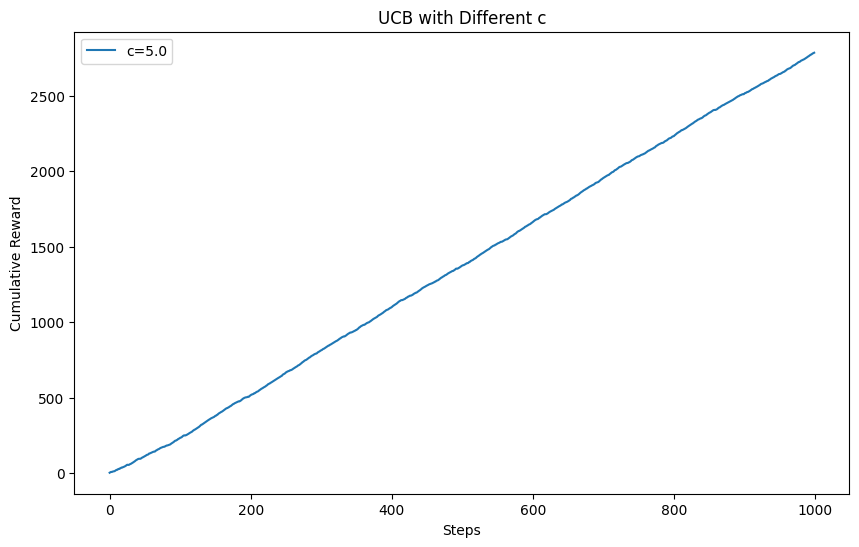

In [35]:
plt.figure(figsize=(10, 6))
for idx, c in enumerate(c_values):
    plt.plot(cumulative_rewards[idx], label='c='+str(c))
plt.legend()
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.title('UCB with Different c')
plt.show()